In [1]:
# Visualisation des données
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Pré-traitement des données
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Pour tester les performances des modèles utilisés
from sklearn import metrics

# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Selection des paramètres 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif, f_classif, RFE

# Resampling 
from sklearn.utils import resample

In [2]:
data_pima = pd.read_csv('./diabetes.csv')
data_pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
data_pima.isnull().value_counts().any

<bound method NDFrame._add_numeric_operations.<locals>.any of Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI    DiabetesPedigreeFunction  Age    Outcome
False        False    False          False          False    False  False                     False  False      768
dtype: int64>

On a alors prouvé de deux façons différentes qu'on a aucune valeur manquante dans notre dataset, on va maintenant passer à l'analyse des données qu'on a

In [17]:
data_pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
data_pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Distribution de nos variables')

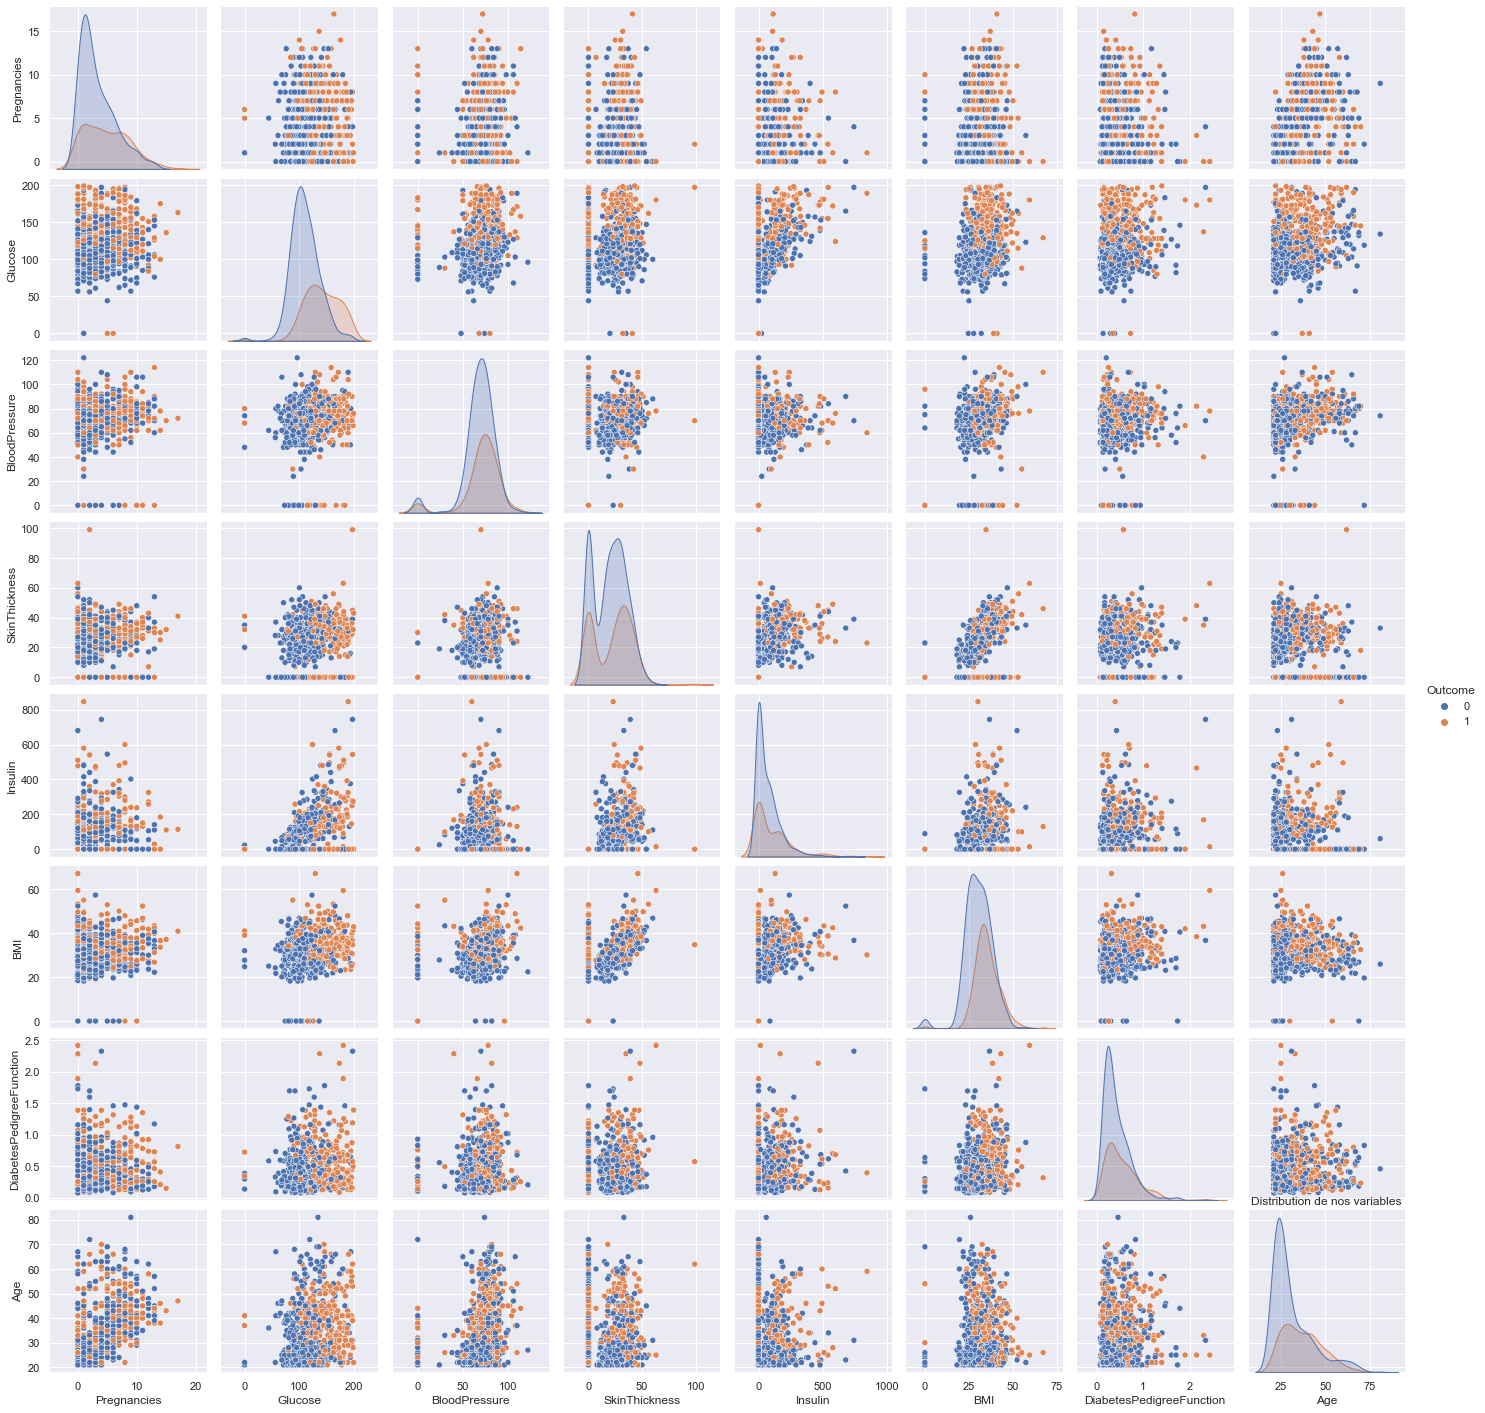

In [24]:
sns.set_theme()
sns.pairplot(data_pima,hue='Outcome')
plt.title('Distribution de nos variables')

On voit bien que la distribution qu'on a rend la classification relativement compliqué, puisque les distributions des deux catégories sont assez similaires

Text(0.5, 1.0, "Matrice d'autocorrélation des données")

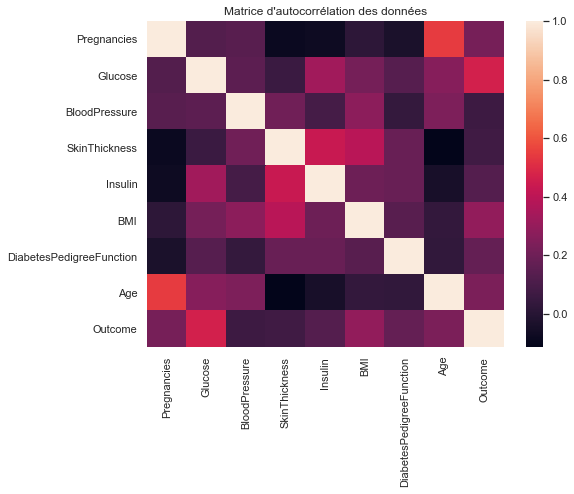

In [26]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,6))
sns.heatmap(data_pima.corr())
plt.title("Matrice d'autocorrélation des données")

On voit la distribution de chacune de nos variable

Text(0.5, 1.0, 'Age')

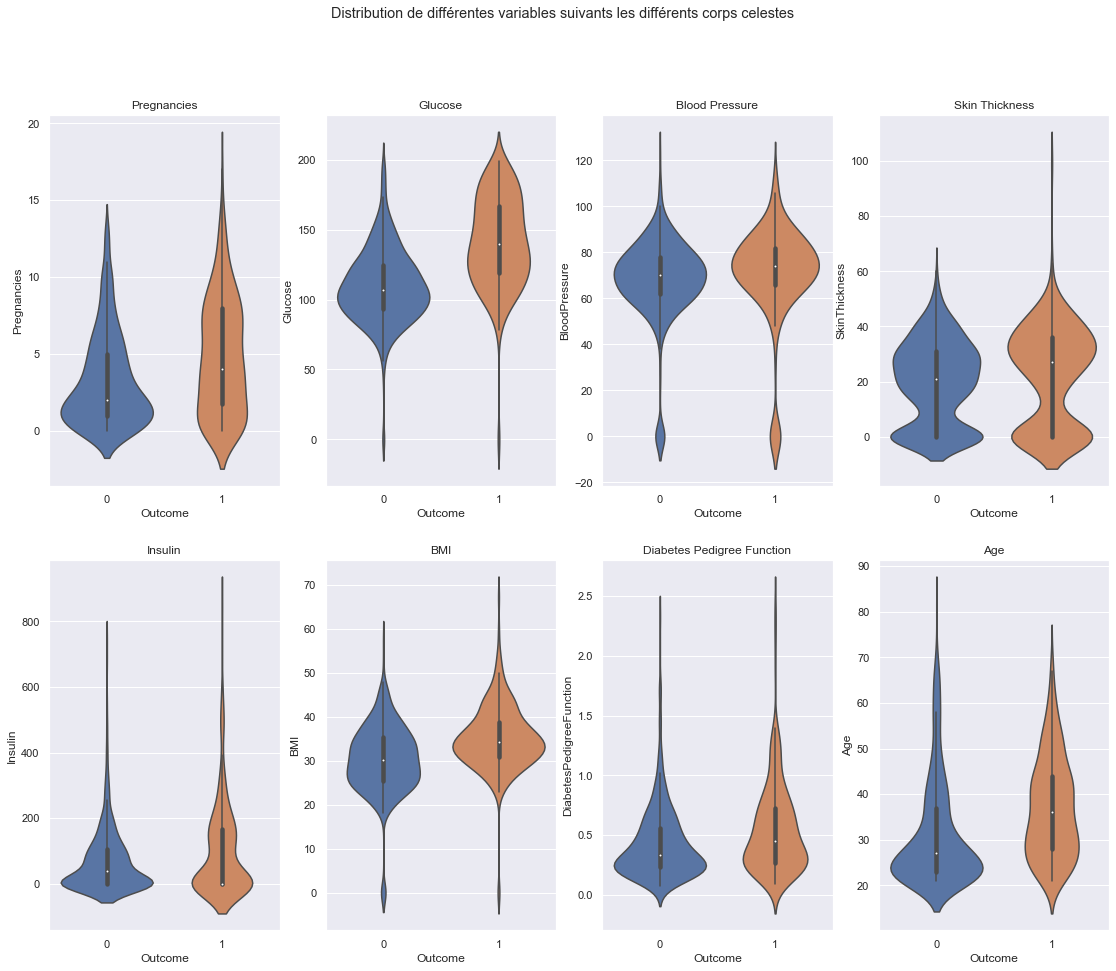

In [29]:
fig, axes = plt.subplots(2, 4, figsize=(19,15),)
fig.suptitle('Distribution de différentes variables suivants les différents corps celestes')

sns.violinplot(ax=axes[0, 0],data=data_pima ,x='Outcome', y='Pregnancies')
axes[0,0].set_title('Pregnancies')

sns.violinplot(ax=axes[0, 1],data=data_pima ,x='Outcome', y='Glucose')
axes[0,1].set_title('Glucose')

sns.violinplot(ax=axes[0, 2],data=data_pima ,x='Outcome', y='BloodPressure')
axes[0,2].set_title('Blood Pressure')

sns.violinplot(ax=axes[0, 3],data=data_pima ,x='Outcome', y='SkinThickness')
axes[0,3].set_title('Skin Thickness')

sns.violinplot(ax=axes[1, 0],data=data_pima ,x='Outcome', y='Insulin')
axes[1,0].set_title('Insulin')

sns.violinplot(ax=axes[1, 1],data=data_pima ,x='Outcome', y='BMI')
axes[1,1].set_title('BMI')

sns.violinplot(ax=axes[1, 2],data=data_pima ,x='Outcome', y='DiabetesPedigreeFunction')
axes[1,2].set_title('Diabetes Pedigree Function')

sns.violinplot(ax=axes[1, 3],data=data_pima ,x='Outcome', y='Age')
axes[1,3].set_title('Age')